In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\rines\Downloads\archive (10)\Housing.csv")  
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df_encoded = df.copy()

# Binary encoding for yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

# One-hot encoding for furnishingstatus
df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'], drop_first=True)

df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [6]:
df_encoded = df.copy()

# Binary encoding for yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

# One-hot encoding for furnishingstatus
df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'], drop_first=True)

df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


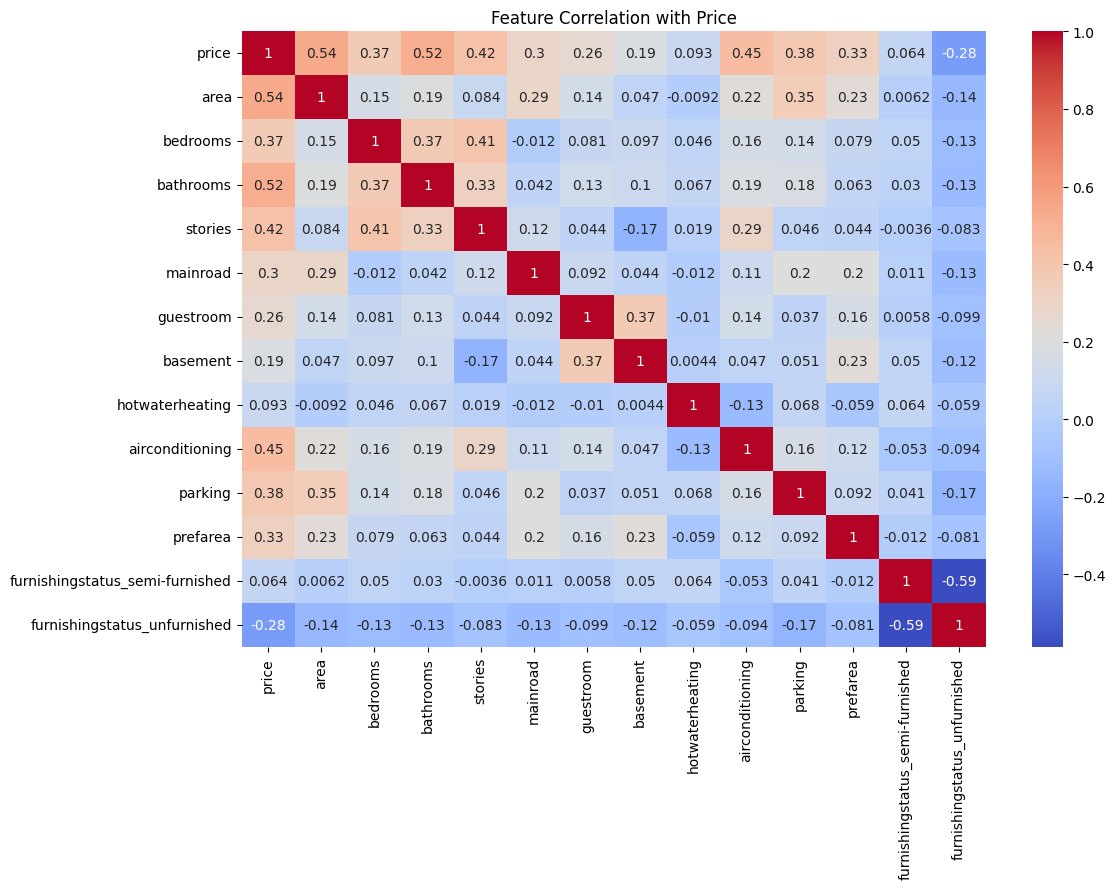

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Price")
plt.show()

In [8]:
X_simple = df_encoded[['area']]
y = df_encoded['price']

In [9]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [10]:
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
y_pred_s = model_simple.predict(X_test_s)

print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))

MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


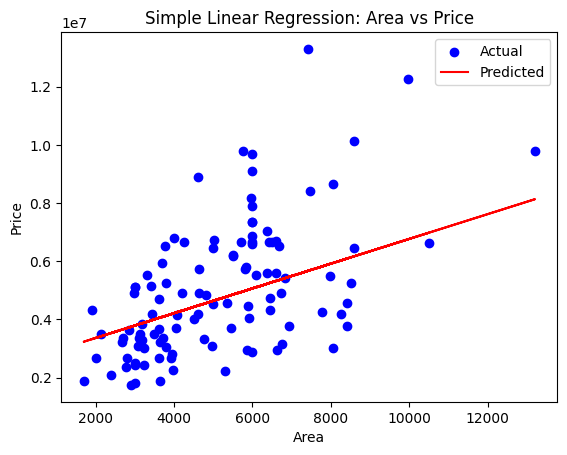

In [12]:
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

In [13]:
X_multi = df_encoded.drop('price', axis=1)
y_multi = df_encoded['price']

In [14]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [15]:
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred_m = model_multi.predict(X_test_m)

print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))

MAE: 970043.4039201637
MSE: 1754318687330.6628
R² Score: 0.6529242642153186


In [17]:
coeff_df = pd.DataFrame(model_multi.coef_, X_multi.columns, columns=['Coefficient'])
print("Intercept:", model_multi.intercept_)
coeff_df

Intercept: 260032.35760741588


,Coefficient
area,2.359688e+02
bedrooms,7.677870e+04
bathrooms,1.094445e+06
stories,4.074766e+05
mainroad,3.679199e+05
guestroom,2.316100e+05
basement,3.902512e+05
hotwaterheating,6.846499e+05
airconditioning,7.914267e+05
parking,2.248419e+05
